# ***NLP Genshin Impact Review Project***

### ***1. Introduction***

原神(Genshin Impact) Sentiment Review 

Objective : to predict the sentiment based on the review of Genshin Impact in Google Play if there are a new user that play the game, then leave a review, this task will predict whether the last review are into three sentiment: Positive, Neutral, or Negative-- and for the continuous improvement to the company since the dataset is considered as a real-time review and it can be an aspiration for the company that create Genshin Impact, "Hoyoverse" to improve their product to gain more profit.  

### ***2. Import Libraries***

In [87]:
# Write your code here

# Write your code here

# Import Libraries
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Load the data libraries from internet
import zipfile
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.callbacks import EarlyStopping

# Visualisation Word
from wordcloud import WordCloud
from collections import Counter

# Additional NLTK
nltk.download('stopwords', 'punkt')

# Feature Engineering & Modelling tools
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

from google.colab import files


[nltk_data] Downloading package stopwords to punkt...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### ***3. Data Loading***

In [89]:
# Write your code here
df = pd.read_csv('genshin_review.csv')

# Call the set variable
df

,review,rating
0,Absolute Masterpiece i hate the people who gav...,5
1,amazing but the fandom isn't amazing,5
2,Very nice,5
3,Give me gambling money (primo gems),4
4,"This is one my first Open World RPG games, and...",4
...,...,...
990,Yeah,4
991,Getting bored,3
992,This game sucks,1
993,"""If Adventuring in Teyvat was a dream, Genshin...",5


In [90]:
# Check the info detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  995 non-null    object
 1   rating  995 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [91]:
# Rename the column name from rating to sentiment
df = df.rename(columns={'rating': 'sentiment'})

# Call the set variable
df

,review,sentiment
0,Absolute Masterpiece i hate the people who gav...,5
1,amazing but the fandom isn't amazing,5
2,Very nice,5
3,Give me gambling money (primo gems),4
4,"This is one my first Open World RPG games, and...",4
...,...,...
990,Yeah,4
991,Getting bored,3
992,This game sucks,1
993,"""If Adventuring in Teyvat was a dream, Genshin...",5


In [92]:
# Observe the duplicated rows within the dataset
df.duplicated().sum()

47

In [93]:
# Drop the duplicated rows within the dataset
df = df.drop_duplicates()

# Observe again after checking the duplicated rows
df.duplicated().sum()

0

In [94]:
# Observe the IMV
missingValues = df.isnull().sum()
print("Total of IMV for each columns:")
print(missingValues)

Total of IMV for each columns:
review       0
sentiment    0
dtype: int64


In [95]:
# Observe the unique's dataset
df.nunique()

review       944
sentiment      5
dtype: int64

In [96]:
# Observe the dataset's statistical
df.describe()

,sentiment
count,948.000000
mean,3.656118
std,1.692862
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [97]:
# Check the Unique Value from the review
df['sentiment'].unique()

array([5, 4, 1, 2, 3])

the result consists of 5 sentiments that are:

- 5  
- 4  
- 1  
- 2  
- 3

this means the rating from 1 star to 5 stars in google play of review the Genshin Impact.

### ***4. Exploratory Data Analysis***

In [98]:
# Replicate the dataset for EDA
dfEda = df.copy()

the code above is to make a dummy that focus on EDA which means we wouldn't be worried to configure the dataset for Feature Engineering and further to model implementation and experiment.

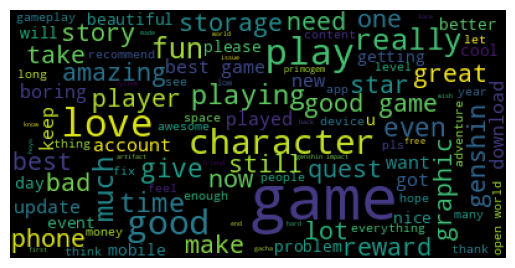

In [99]:
# Write your code here

# Combine all the text in the 'review' column into a single string
text = " ".join(df['review'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="antialiased")
plt.axis("off")
plt.show()

As we can see the picture above, it's like the biggest or the easiest word to see is the most used words in the dataset of review of Genshin impact. for example, the review talks about `game`, it is obviously a review about game. another example, `character`, because Genshin Impact has a lot of unique character, it is the second most used word after `game`

In [100]:
# Create top 25 highest words mode
dfEda['review_list'] = dfEda['review'].apply(lambda x:str(x).split())
highAll = Counter([item for sublist in dfEda['review_list'] for item in sublist])
reviewHighAll = pd.DataFrame(highAll.most_common(26))
reviewHighAll.columns = ['Words', 'Count']
reviewHighAll.style.background_gradient(cmap='Blues')

,Words,Count
0,the,676
1,I,556
2,and,542
3,game,531
4,to,433
5,is,374
6,a,350
7,it,345
8,this,251
9,but,249


the result above is to show how many words are oftenly used in the dataset of review the game called Genshin Impact.

we can see the color fading from the top to the bottom, it indicates that the more color fading from blue to white is, the less word used.

In [101]:
# Assuming dfEda is your DataFrame and 'review' is the column with text reviews

# Create top 25 highest words mode
dfEda['review_list'] = dfEda['review'].apply(lambda x: str(x).split())
highAll = Counter([item for sublist in dfEda['review_list'] for item in sublist])
reviewHighAll = pd.DataFrame(highAll.most_common(26))
reviewHighAll.columns = ['Words', 'Count']
reviewHighAll.style.background_gradient(cmap='Blues')

# Get a list of words followed by their count
word_count_list = list(zip(reviewHighAll['Words'], reviewHighAll['Count']))

# Print the list of words and their counts
for word, count in word_count_list:
    print(f'{word}: {count}')


the: 676
I: 556
and: 542
game: 531
to: 433
is: 374
a: 350
it: 345
this: 251
but: 249
of: 216
for: 179
you: 175
my: 168
in: 160
like: 147
so: 146
good: 132
i: 126
are: 118
have: 117
not: 117
love: 116
that: 112
play: 111
on: 109


the result above is to show how many words are oftenly used in the dataset of review the game called Genshin Impact

In [102]:
# Extract the most words counted into the list
wordList = reviewHighAll['Words'].tolist()

# Print the list of words above
wordList

['the',
 'I',
 'and',
 'game',
 'to',
 'is',
 'a',
 'it',
 'this',
 'but',
 'of',
 'for',
 'you',
 'my',
 'in',
 'like',
 'so',
 'good',
 'i',
 'are',
 'have',
 'not',
 'love',
 'that',
 'play',
 'on']

the result above is to grading the most used words in the review from the dataset given. it is obviously in English language, whenever we would like to emphasize things to make it clear, we usually use the word "The"

### ***5. Feature Engineering***

In [103]:
# To convert Sentiment from 5 ratings
sentiment = []



for i in df['sentiment']:
    if i >= 4:
        sentiment.append('positive')
    elif i == 3:
        sentiment.append('neutral')
    else:
        sentiment.append('negative')


df['target'] = sentiment


the cell code above indicates that the user wants to convert from all those five ratings into three sentiments that are: Positive, Neutral, and Negative.

In [104]:
# Write your code here

# Define Stopwords
stopWords = list(set(stopwords.words('english')))
additionalStopwords = [
    'the', 'I', 'and', 'to', 'is', 'a', 'it', 'this', 'but',
    'of', 'for', 'you', 'my', 'in', 'like', 'so', 'good', 'i', 'are',
    'have', 'not', 'that', 'on', "'s"
]
stopWords.extend(additionalStopwords)

# Define Stemming
lemmatizer = WordNetLemmatizer()

Since the dataset mostly are used in English language, the user decided to use the stop words in english such as the connection word: `and`, `to`, `for`, `of`, but and so on. On the other hand, the user input the conjunction words manually such as `it`, `this`, `you`, `my`, and `like`

In [105]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stopWords]

  # Stemming
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

the cell code above is the configuration for removing any weird letters and characters such as emoticons, abnormal text like mistyping, whitespace meaning the additional space of words after words; "too  much", and new line removal.

In [106]:
# Link the text preprocessing to the dataset
df['text_processed'] = df['review'].apply(lambda x: text_preprocessing(x))

# call the last dataset after customise
df

,review,sentiment,target,text_processed
0,Absolute Masterpiece i hate the people who gav...,5,positive,absolute masterpiece hate people gave beautifu...
1,amazing but the fandom isn't amazing,5,positive,amazing fandom n't amazing
2,Very nice,5,positive,nice
3,Give me gambling money (primo gems),4,positive,give gambling money primo gem
4,"This is one my first Open World RPG games, and...",4,positive,one first open world rpg game think never love...
...,...,...,...,...
990,Yeah,4,positive,yeah
991,Getting bored,3,neutral,getting bored
992,This game sucks,1,negative,game suck
993,"""If Adventuring in Teyvat was a dream, Genshin...",5,positive,adventuring teyvat dream genshin impact truly ...


Now we can see above the result after configuration of removal any kinds of unnatural pure texts starting from the column of `review` which there are so much abnormal characters especially the row number 994 which the text contains so much emoticons, and all those unconfigured texts after processing, all the words are changed into lower case and grasp the data into its origin form of words.

In [107]:
# Display the Target

df.sentiment.unique()

array([5, 4, 1, 2, 3])

In [108]:
# call the dataset after customised for the target
df

,review,sentiment,target,text_processed
0,Absolute Masterpiece i hate the people who gav...,5,positive,absolute masterpiece hate people gave beautifu...
1,amazing but the fandom isn't amazing,5,positive,amazing fandom n't amazing
2,Very nice,5,positive,nice
3,Give me gambling money (primo gems),4,positive,give gambling money primo gem
4,"This is one my first Open World RPG games, and...",4,positive,one first open world rpg game think never love...
...,...,...,...,...
990,Yeah,4,positive,yeah
991,Getting bored,3,neutral,getting bored
992,This game sucks,1,negative,game suck
993,"""If Adventuring in Teyvat was a dream, Genshin...",5,positive,adventuring teyvat dream genshin impact truly ...


In [109]:
# Change Target into Number
df['label'] = df['target'].replace({'negative': 0,
                                    'neutral': 1, 'positive': 2})

# Call the dataset after customised
df

,review,sentiment,target,text_processed,label
0,Absolute Masterpiece i hate the people who gav...,5,positive,absolute masterpiece hate people gave beautifu...,2
1,amazing but the fandom isn't amazing,5,positive,amazing fandom n't amazing,2
2,Very nice,5,positive,nice,2
3,Give me gambling money (primo gems),4,positive,give gambling money primo gem,2
4,"This is one my first Open World RPG games, and...",4,positive,one first open world rpg game think never love...,2
...,...,...,...,...,...
990,Yeah,4,positive,yeah,2
991,Getting bored,3,neutral,getting bored,1
992,This game sucks,1,negative,game suck,0
993,"""If Adventuring in Teyvat was a dream, Genshin...",5,positive,adventuring teyvat dream genshin impact truly ...,2


the summary from the target display to the cell code above, is to double-check the result after configuration to see whether the works has been successsfully accomplished, starting from checking the sentiment level to the `target`, after grasping the `target` then put the final configuration into the column of `label` which consists of the encoding from the column `target` that translated from `sentiment`.

In [110]:
# Display the Target
df['label'].value_counts()

label
2    614
0    276
1     58
Name: count, dtype: int64

In [111]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(df.text_processed,
                                                    df.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (724,)
Val Size   :  (81,)
Test Size  :  (143,)


In [112]:
# Change Target to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

> there are three cell code above that about to be narrates.

the first cell code is to check the counts of the data numbers in the column of `label`.

the second cell code is to separate the data into three types for this task, there are: Train-set (for the testing reference), Val-set (it's like the quality check pass of the data from the Train-set), then Test-set (the final output that about to be implemented)

the third cell code is to convert the target into One Hot Encoding where the output is in between 0 and 1.

### ***6. ANN Training (Sequential API / Functional API)***

In this section, we would like to initiate the preliminary experiment after finished the Feature Engineering for the model we created by going through the definition of the model, then training the model that has been defined, after we trained the defined model, we are going through the evaluation after implement the model we created. it's like the prototype model before we execute into real case.

- Model Definition

In [113]:
# At this point the user don't have any idea whether
## this cell code already in this section or not

# Vectorisation to get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<724x2017 sparse matrix of type '<class 'numpy.int64'>'
	with 6949 stored elements in Compressed Sparse Row format>

In [114]:
# Finding the number of Vocabularies & Max Token Length in One Document

totalVocab = len(Vectorize.vocabulary_.keys())
maxSenLen = max([len(i.split(" ")) for i in X_train])

# Call the combo variable
print(f'Total Vocab:{totalVocab}')
print(f'Maximum Sentence Length are: {maxSenLen} tokens')

Total Vocab:2017
Maximum Sentence Length are: 79 tokens


the output indicates that the whole dataset contains 2017 words, and there are one longest sentence which contains 79 words which translated into a tokens where we would like to experiment further for the model we created.

In [115]:
# Text Vectorisation

text_vectorisation = TextVectorization(max_tokens=totalVocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=maxSenLen,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorisation.adapt(X_train)

In [116]:
# Example Result

## Document example
print('Document example')
print(df.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorisation([df.text_processed[0]]))
print('Vector size : ', text_vectorisation([df.text_processed[0]]).shape)

Document example
absolute masterpiece hate people gave beautiful game star n't storage play n't mean problem

Result of Text Vectorization
tf.Tensor(
[[ 850 1390  147   79  498   54    2   15    3   22    6    3  212   62
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]], shape=(1, 79), dtype=int64)
Vector size :  (1, 79)


In [117]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorisation.get_vocabulary()[:20]

['',
 '[UNK]',
 'game',
 'nt',
 'love',
 'character',
 'play',
 'get',
 'really',
 'give',
 'much',
 'story',
 'playing',
 'genshin',
 'time',
 'star',
 'fun',
 'best',
 'even',
 'amazing']

In [118]:
embedding = Embedding(input_dim=totalVocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=maxSenLen)

In [119]:
## Document example
print('Document example')
print(df.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorisation([df.text_processed[0]]))
print('Vector size : ', text_vectorisation([df.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorisation([df.text_processed[0]])))
print('Vector size : ', embedding(text_vectorisation([df.text_processed[0]])).shape)

Document example
absolute masterpiece hate people gave beautiful game star n't storage play n't mean problem

Result of  Text Vectorization
tf.Tensor(
[[ 850 1390  147   79  498   54    2   15    3   22    6    3  212   62
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]], shape=(1, 79), dtype=int64)
Vector size :  (1, 79)

Result of  Embedding
tf.Tensor(
[[[-0.04761494 -0.01043042  0.02612528 ...  0.01233709  0.02866452
    0.01630962]
  [-0.0342494   0.02870406  0.01592732 ...  0.00852033  0.03223157
   -0.00299407]
  [-0.00387335  0.04969795  0.01829058 ...  0.01240142 -0.00314599
   -0.04726195]
  ...
  [ 0.04224542  0.01231723  0.01330775 ... -0.01981616  0.03348171
   -0.01912752]
  [ 0.04224542  0

- Model Training

In [121]:
y_train_ohe

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [122]:
# check the data types and shapes before passing them to the model:
print("X_train type:", type(X_train), "shape:", X_train.shape)
print("y_train_ohe type:", type(y_train_ohe), "shape:", y_train_ohe.shape)
print("X_val type:", type(X_val), "shape:", X_val.shape)
print("y_val_ohe type:", type(y_val_ohe), "shape:", y_val_ohe.shape)


X_train type: <class 'pandas.core.series.Series'> shape: (724,)
y_train_ohe type: <class 'numpy.ndarray'> shape: (724, 3)
X_val type: <class 'pandas.core.series.Series'> shape: (81,)
y_val_ohe type: <class 'numpy.ndarray'> shape: (81, 3)


In [123]:
X_train

313                                                 game
568    resolution low phone even seting highest possi...
382                                gacha gak bagus bagus
921    loved silly bug fixed story character design e...
297                                        nice game lag
                             ...                        
502                                                     
731    j amazingg luv detail gravity woman anatomy yk...
661    great game overall tartaglia bos fight keep gl...
379    sad see game become nothing cash grab wasted p...
670    going lie funner honka star rail cuz needed ta...
Name: text_processed, Length: 724, dtype: object

In [124]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorisation)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(3, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping Callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the Model
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe), callbacks=[earlyStopping])

Epoch 1/50
23/23 [==============================] - 38s 535ms/step - loss: 0.8984 - accuracy: 0.6506 - val_loss: 0.8005 - val_accuracy: 0.6420
Epoch 2/50
23/23 [==============================] - 6s 259ms/step - loss: 0.7591 - accuracy: 0.6533 - val_loss: 0.7581 - val_accuracy: 0.6543
Epoch 3/50
23/23 [==============================] - 8s 372ms/step - loss: 0.6431 - accuracy: 0.7652 - val_loss: 0.6263 - val_accuracy: 0.7531
Epoch 4/50
23/23 [==============================] - 7s 291ms/step - loss: 0.4378 - accuracy: 0.8605 - val_loss: 0.6559 - val_accuracy: 0.7901
Epoch 5/50
23/23 [==============================] - 9s 404ms/step - loss: 0.3415 - accuracy: 0.8964 - val_loss: 0.7771 - val_accuracy: 0.7284
Epoch 6/50
23/23 [==============================] - 5s 198ms/step - loss: 0.2561 - accuracy: 0.9199 - val_loss: 0.8834 - val_accuracy: 0.7531
Epoch 7/50
23/23 [==============================] - 4s 155ms/step - loss: 0.2058 - accuracy: 0.9268 - val_loss: 0.9486 - val_accuracy: 0.7531
Epoch

The Model learns the pattern or its subject to grasp the dataset to extract all review into three categories: Positive, Neutral, and Negative. EPOCH in this output means how many times does the model have to learn and understand the concept of the dataset after we create the pattern to make an output. it seems that at EPOCH 8 indicates that the best learning is at eight times experiments of learning.  

- Model Evaluation

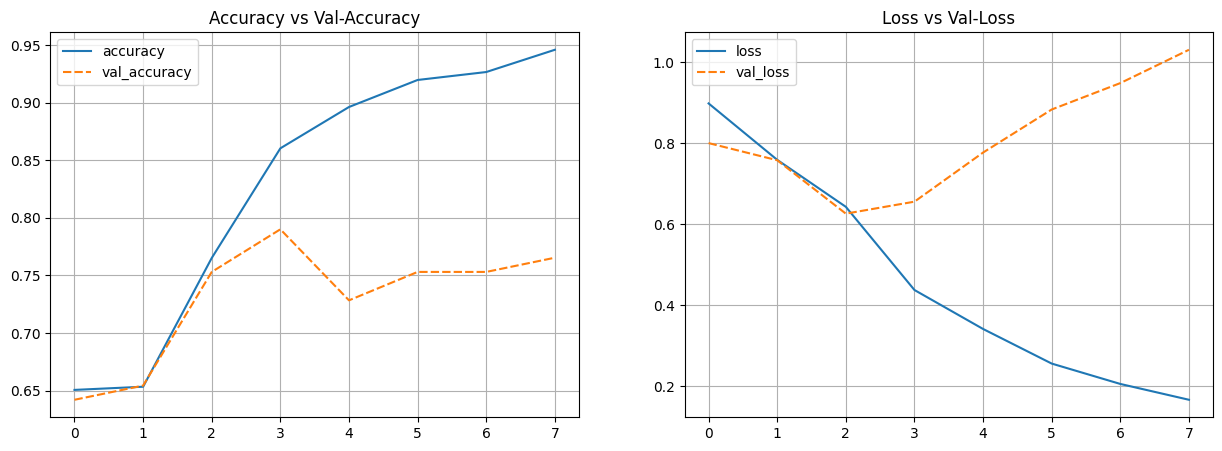

In [125]:
# Write your code here

# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

from the graphs above, we can depict that the learning curves of accuracy seems to be good fit beginning from the 0th to 1st EPOCH which means the machine learns well to the 2nd EPOCH, but turns out underfit due to some uncertain texts in different language starting from the 3rd EPOCH to 7th EPOCH. the model above stopped early at 7th EPOCH because the user thinks that the highest peak of machine's learning is at it's best condition. 

Meanwhile the learning curves of loss (graphs on the right canvas), it is similar to the learning curves of accuracy which it tends to be good fit on the 0th to 2nd EPOCH. However, the model's learning unfortunately overfitting from the 3rd EPOCH to the 7th EPOCH. stopped early again due to the highest peak of machine's laerning at best condition. 

the reason to use CallBack of EarlyStopping is to simply prevent the overfitting or underfitting. but it turns out the reality seems quite underfit for the accuracy's learning curve and overfit for val-loss

### ***7. ANN Improvement (Sequential API / Functional API)***

after the preliminary model implementation, this section is to improve the model learning by using Transfer Learning.

- Model Definition

In [126]:
# Write your code here

## Download the Embedding Layer for improvement graphs above

url = "https://www.kaggle.com/models/google/nnlm/TensorFlow2/en-dim128-with-normalization/1"

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

- Model Training

In [127]:
# Write your code here

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.3))
model_lstm_2.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.3))
model_lstm_2.add(Dense(3, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# Define EarlyStopping Callbacks
earlyStopping1 = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe), callbacks=[earlyStopping1])


Epoch 1/50
23/23 [==============================] - 16s 309ms/step - loss: 0.9621 - accuracy: 0.6271 - val_loss: 0.8220 - val_accuracy: 0.6420
Epoch 2/50
23/23 [==============================] - 8s 331ms/step - loss: 0.8367 - accuracy: 0.6492 - val_loss: 0.8192 - val_accuracy: 0.6420
Epoch 3/50
23/23 [==============================] - 4s 172ms/step - loss: 0.8200 - accuracy: 0.6492 - val_loss: 0.8162 - val_accuracy: 0.6420
Epoch 4/50
23/23 [==============================] - 4s 162ms/step - loss: 0.8168 - accuracy: 0.6492 - val_loss: 0.8166 - val_accuracy: 0.6420
Epoch 5/50
23/23 [==============================] - 5s 242ms/step - loss: 0.8280 - accuracy: 0.6492 - val_loss: 0.8175 - val_accuracy: 0.6420
Epoch 6/50
23/23 [==============================] - 4s 173ms/step - loss: 0.8093 - accuracy: 0.6492 - val_loss: 0.8138 - val_accuracy: 0.6420
Epoch 7/50
23/23 [==============================] - 4s 169ms/step - loss: 0.8117 - accuracy: 0.6492 - val_loss: 0.8090 - val_accuracy: 0.6420
Epoch

now that the model has improve by using transfer learning that provided from kaggle, the model seems improved its learning and getting used to the pattern after using the transfer learning, and the cell code above picks 50 EPOCHS to see the model's performance. However, the model stops at 15th EPOCH seems the model's best performance is at 15th EPOCH-- meaning the model's best learning is done 15 times then stop to prevent the under/over fitting. 

- Model Evaluation

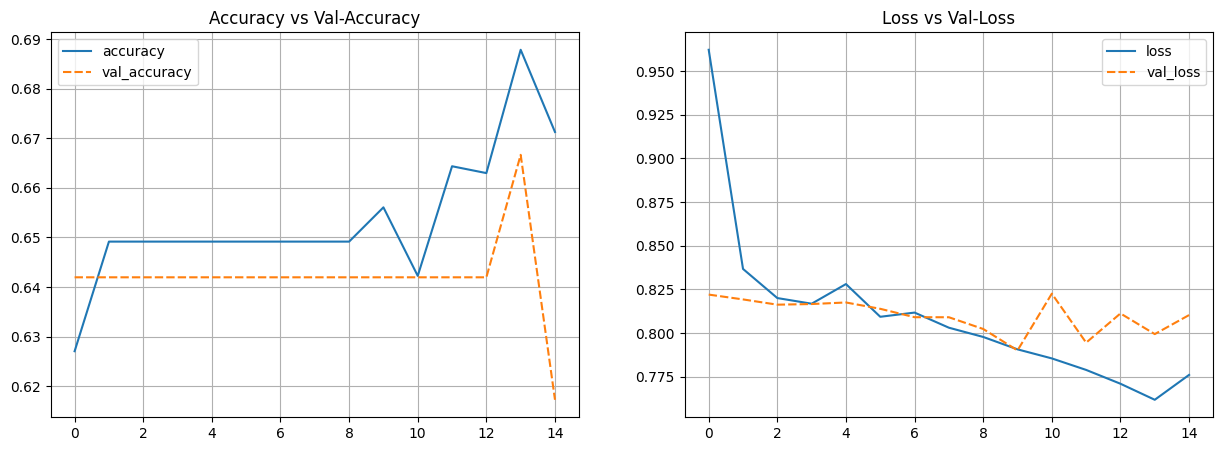

In [128]:
# Write your code here

## Plot Training after Transfer Learning

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

after we improve through machine model transfer learning, it is considered slightly underfit at the beginning for the model to learn the pattern from the dataset beginning at the first EPOCH to 10th EPOCH (which indicates the times of model to learn) looks consistent good slightly under fit, then it seems might be drastically underfit due to some texts are in different languages, such as Indonesian, Chinese, Russian, Thai, Chinese, and Indian.  

the user observe based on his personal arguments that the transfer learning model is only focus on English language, and the dataset contains variative languages, it could be a trigger for the model output fit between accuracy and the val-accuracy

### ***8. Model Saving***

after experimenting the model through preliminary prototype modelling and improved by using transfer learning, the cell code below is to save the blueprint to predict the review that will be executed on the inference. 

In [129]:
# Write your code here

# Save the model
model_lstm_2.save('model')

# Directory name of model name
model_dir = 'model'

# Save model as TensorFlow SavedModel
model_lstm_2.save(model_dir, save_format='tf')

In [130]:
# Compress the folder
!zip -r model.zip model

# Download the compressed folder
files.download('model.zip')

updating: model/ (stored 0%)
updating: model/assets/ (stored 0%)
updating: model/assets/tokens.txt (deflated 43%)
updating: model/keras_metadata.pb (deflated 92%)
updating: model/variables/ (stored 0%)
updating: model/variables/variables.data-00000-of-00001 (deflated 7%)
updating: model/variables/variables.index (deflated 66%)
updating: model/saved_model.pb (deflated 90%)
updating: model/fingerprint.pb (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ***9. Model Inference***

The Inference will be tested in a different notebook which called as P2G7_Daffa.Darwin_inf.ipynb

### ***10. Conclusion Extract***

to summarize this task, we can predict whenever a new user that plays Genshin Impact, the created model can predict whether the review are into positive review, neutral review, or negative review.

since the review is about a game, the company that develop the game can make an improvement from the user's experience, where it can be win-to-win solutions both for the company of Genshin Impact "Hoyoverse" gather more benefit, profit, and well-known name, meanwhile the user can happily play the game with more improvement and great experience after the company of Genshin Impact "Hoyoverse" gain so much feedback that boost their product's performance.


***RECOMMENDATION***:  
since the dataset obtained from the real-time testimony, it is better for Hoyoverse to listen more to their customers (in this case, people that play Genshin Impact are considered as Hoyoverse's customer) so with this model, the company can classify which the review is good for them to improve their product, not necessary for them to improve their product, and bad review for their product's improvement.